## Imports

In [1]:
from pathlib import Path
import pandas as pd
import json
import nibabel as nib
import numpy as np

from src.database import *
import matplotlib.pyplot as plt
plt.style.use('custom_matplotlibrc')
plt.rcParams["figure.figsize"] = (20,5)
fig_id = 0

import seaborn as sns

# Set the color palette
pal=sns.color_palette("Set2")

## Configurations

In [2]:
database_path = Path('databases/3T_human_T1maps_database.pkl')
output_folder = Path("plots/08_wholedataset_scatter_Human/")

estimate_type = 'mean' # median or mean

## Define functions

In [3]:
def plot_single_scatter(x, y, y_std,
                        title, x_label, y_label,
                        file_prefix, folder_path, fig_id,
                        y_type):
    
    intra_bool = np.array([], dtype=bool)
    for ind in x:
        if round(np.double(ind))==9:
            intra_bool = np.append(intra_bool, True)
        else:
            intra_bool = np.append(intra_bool, False)
        
    plt.errorbar(x[~intra_bool][0:-2],y[~intra_bool][0:-2], y_std[~intra_bool][0:-2], fmt='o', solid_capstyle='projecting', color=pal.as_hex()[0])
    plt.errorbar(x[intra_bool],y[intra_bool], y_std[intra_bool], fmt='o', solid_capstyle='projecting', color=pal.as_hex()[1])
    plt.errorbar(x[-1],y[-1], y_std[-1], fmt='o', solid_capstyle='projecting', color=pal.as_hex()[0])

    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if y_type is 'site':
        plt.xticks(np.arange(0, np.max(x), step=1))
    elif y_type is 'meas':
        plt.xticks(rotation=90)
    fig = plt.gcf()

    ax = plt.gca()
    
    folder_path.mkdir(parents=True, exist_ok=True)
    
    if fig_id<10:
        filename = "0" + str(fig_id) + "_" + file_prefix + "_" + str(y_type)
    else:
        filename = str(fig_id) + "_" + file_prefix + "_" + str(y_type)

    fig.savefig(folder_path / (str(filename) + '.svg'), facecolor='white')
    fig.savefig(folder_path / (str(filename) + '.png'), facecolor='white')
    fig_id = fig_id + 1
    plt.show()
    return fig_id

<>:20: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:22: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:20: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:22: SyntaxWarning: "is" with a literal. Did you mean "=="?
/var/folders/l1/1xswjffd73l8yp7dd7pq9lyw0000gn/T/ipykernel_36138/4101298702.py:20: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if y_type is 'site':
/var/folders/l1/1xswjffd73l8yp7dd7pq9lyw0000gn/T/ipykernel_36138/4101298702.py:22: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif y_type is 'meas':


In [4]:
def plot_both_scatter(x1, x2, y, y_std,
                      title, x1_label, x2_label, y_label,
                      file_prefix, folder_path, fig_id):
    
    plt.rcParams["figure.figsize"] = (20,10)

    fig, axs = plt.subplots(2)
    fig.suptitle(title)
    axs[0].errorbar(x1, y, y_std, fmt='o', solid_capstyle='projecting')
    axs[0].set_xlabel(x1_label)
    axs[0].set_ylabel(y_label)
    axs[0].set_xticks(np.arange(0, np.max(x1), step=1))


    axs[1].errorbar(x2, y, y_std, fmt='o', solid_capstyle='projecting')
    axs[1].set_xlabel(x2_label)
    axs[1].set_ylabel(y_label)
    axs[1].set_xticklabels(labels=x2, rotation=90)


    if fig_id<10:
        filename = "0" + str(fig_id) + "_" + file_prefix
    else:
        filename = str(fig_id) + "_" + file_prefix

    fig.savefig(folder_path / (str(filename) + '.svg'), facecolor='white')
    fig.savefig(folder_path / (str(filename) + '.png'), facecolor='white')
    fig_id = fig_id + 1
    plt.show()
    return fig_id

## Load database

In [5]:
df = pd.read_pickle(database_path)

## Initialize variables, store mean and standard deviations of T1 in the ROIs

In [6]:
genu_estimate = np.array([])
genu_std = np.array([])
splenium_estimate = np.array([])
splenium_std = np.array([])
deepgm_estimate = np.array([])
deepgm_std = np.array([])
cgm_estimate = np.array([])
cgm_std = np.array([])

intra_bool = np.array([])
ii = 0
for index, row in df.iterrows():
    intra_bool = np.append(intra_bool, round(index)==9)
    if estimate_type is 'mean':
        genu_estimate = np.append(genu_estimate, np.mean(df.loc[index]['T1 - genu (WM)']))
        genu_std = np.append(genu_std, np.std(df.loc[index]['T1 - genu (WM)']))
        splenium_estimate = np.append(splenium_estimate, np.mean(df.loc[index]['T1 - splenium (WM)']))
        splenium_std = np.append(splenium_std, np.std(df.loc[index]['T1 - splenium (WM)']))
        deepgm_estimate = np.append(deepgm_estimate, np.mean(df.loc[index]['T1 - deep GM']))
        deepgm_std = np.append(deepgm_std, np.std(df.loc[index]['T1 - deep GM']))
        cgm_estimate = np.append(cgm_estimate, np.mean(df.loc[index]['T1 - cortical GM']))
        cgm_std = np.append(cgm_std, np.std(df.loc[index]['T1 - cortical GM']))
    elif estimate_type is 'median':
        genu_estimate = np.append(genu_estimate, np.median(df.loc[index]['T1 - genu (WM)']))
        genu_std = np.append(genu_std, np.std(df.loc[index]['T1 - genu (WM)']))
        splenium_estimate = np.append(splenium_estimate, np.median(df.loc[index]['T1 - splenium (WM)']))
        splenium_std = np.append(splenium_std, np.std(df.loc[index]['T1 - splenium (WM)']))
        deepgm_estimate = np.append(deepgm_estimate, np.median(df.loc[index]['T1 - deep GM']))
        deepgm_std = np.append(deepgm_std, np.std(df.loc[index]['T1 - deep GM']))
        cgm_estimate = np.append(cgm_estimate, np.median(df.loc[index]['T1 - cortical GM']))
        cgm_std = np.append(cgm_std, np.std(df.loc[index]['T1 - cortical GM']))
    else:
        Exception('Unsupported dataset estimate type.')
    ii = ii +1

<>:14: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:23: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:14: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:23: SyntaxWarning: "is" with a literal. Did you mean "=="?
/var/folders/l1/1xswjffd73l8yp7dd7pq9lyw0000gn/T/ipykernel_36138/2637949668.py:14: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if estimate_type is 'mean':
/var/folders/l1/1xswjffd73l8yp7dd7pq9lyw0000gn/T/ipykernel_36138/2637949668.py:23: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif estimate_type is 'median':
/Users/mathieuboudreau/opt/anaconda3/envs/analysis_arm/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/mathieuboudreau/opt/anaconda3/envs/analysis_arm/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/U

In [7]:
# Store the IDs
indexes_numbers = df.index
indexes_strings = indexes_numbers.map(str)

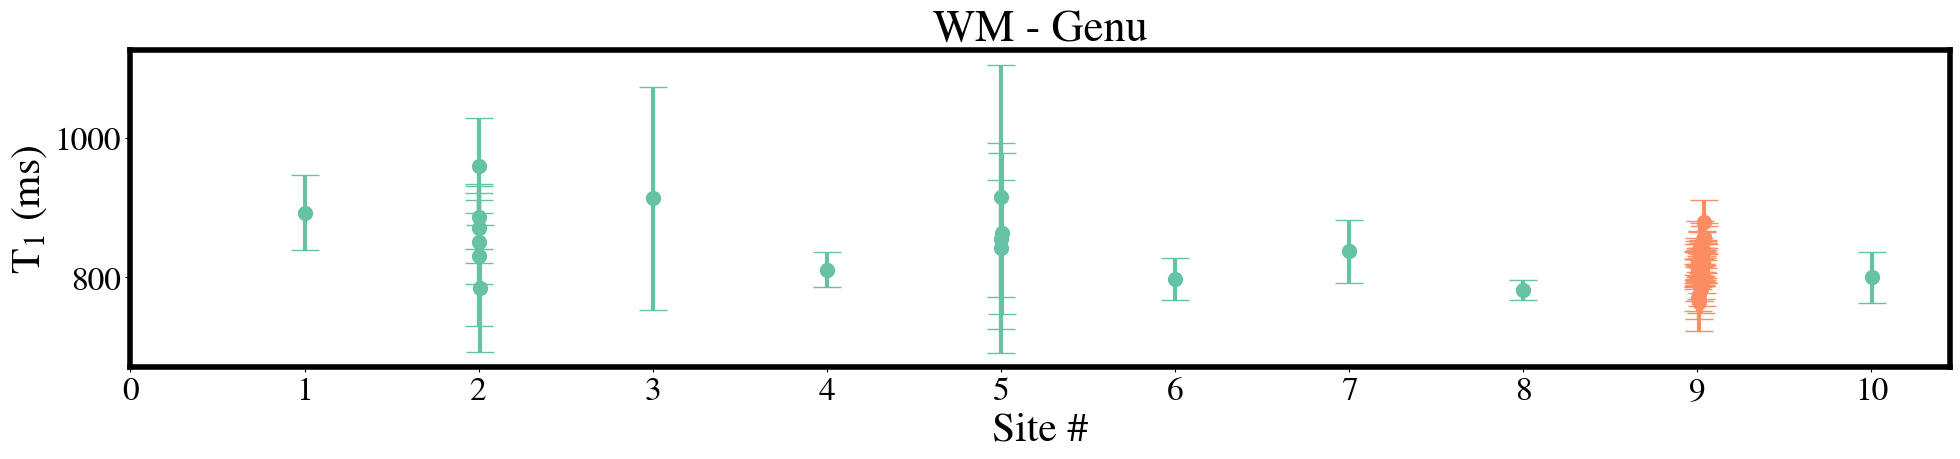

In [8]:
fig_id = plot_single_scatter(x=indexes_numbers,
                             y=genu_estimate,
                             y_std=genu_std,
                             title='WM - Genu',
                             x_label='Site #',
                             y_label="T$_1$ (ms)",
                             file_prefix="WM_genu",
                             folder_path=output_folder,
                             fig_id=fig_id,
                             y_type='site')

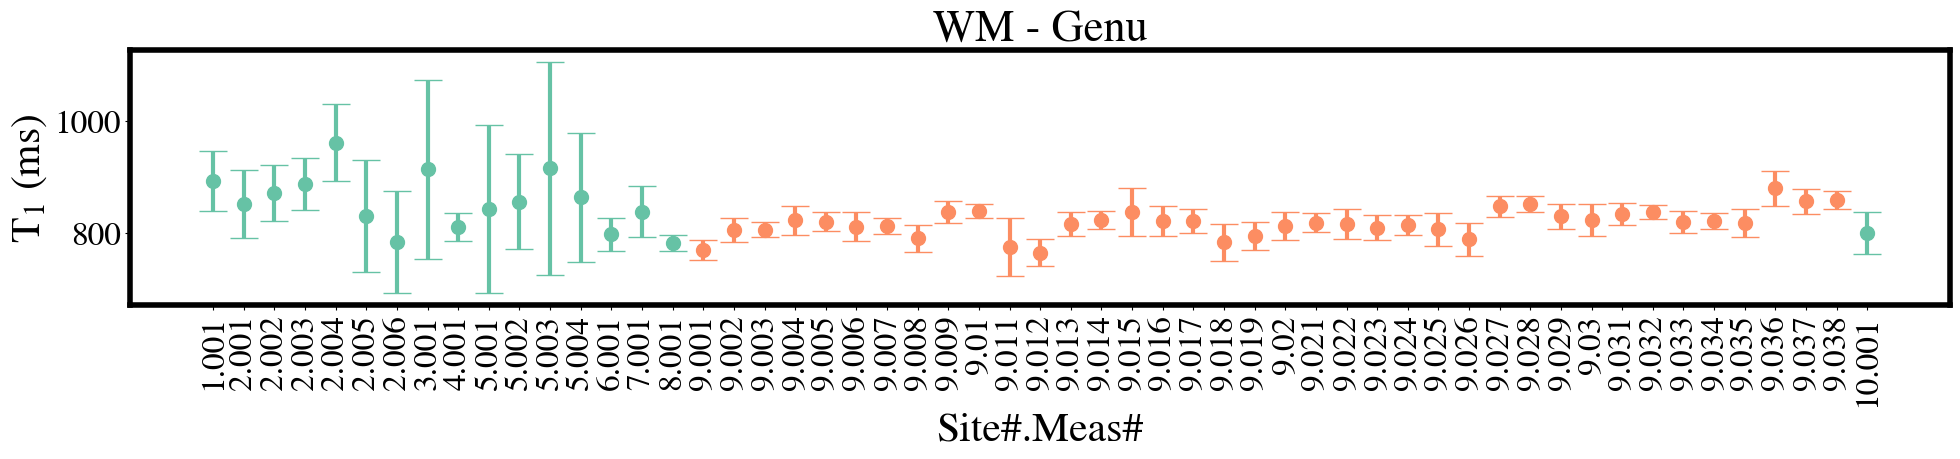

In [9]:
fig_id = plot_single_scatter(x=indexes_strings,
                             y=genu_estimate,
                             y_std=genu_std,
                             title='WM - Genu',
                             x_label='Site#.Meas#',
                             y_label="T$_1$ (ms)",
                             file_prefix="WM_genu",
                             folder_path=output_folder,
                             fig_id=fig_id,
                             y_type='meas')

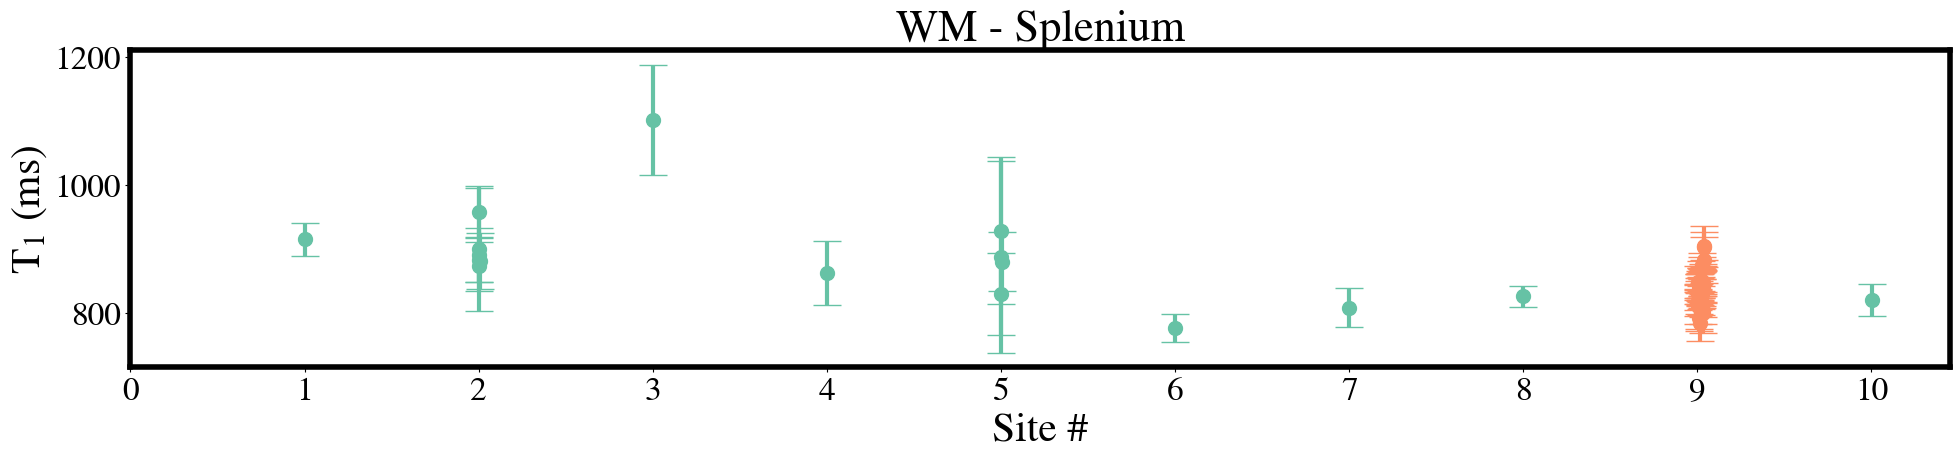

In [10]:
fig_id = plot_single_scatter(x=indexes_numbers,
                             y=splenium_estimate,
                             y_std=splenium_std,
                             title='WM - Splenium',
                             x_label='Site #',
                             y_label="T$_1$ (ms)",
                             file_prefix="WM_splenium",
                             folder_path=output_folder,
                             fig_id=fig_id,
                             y_type='site')

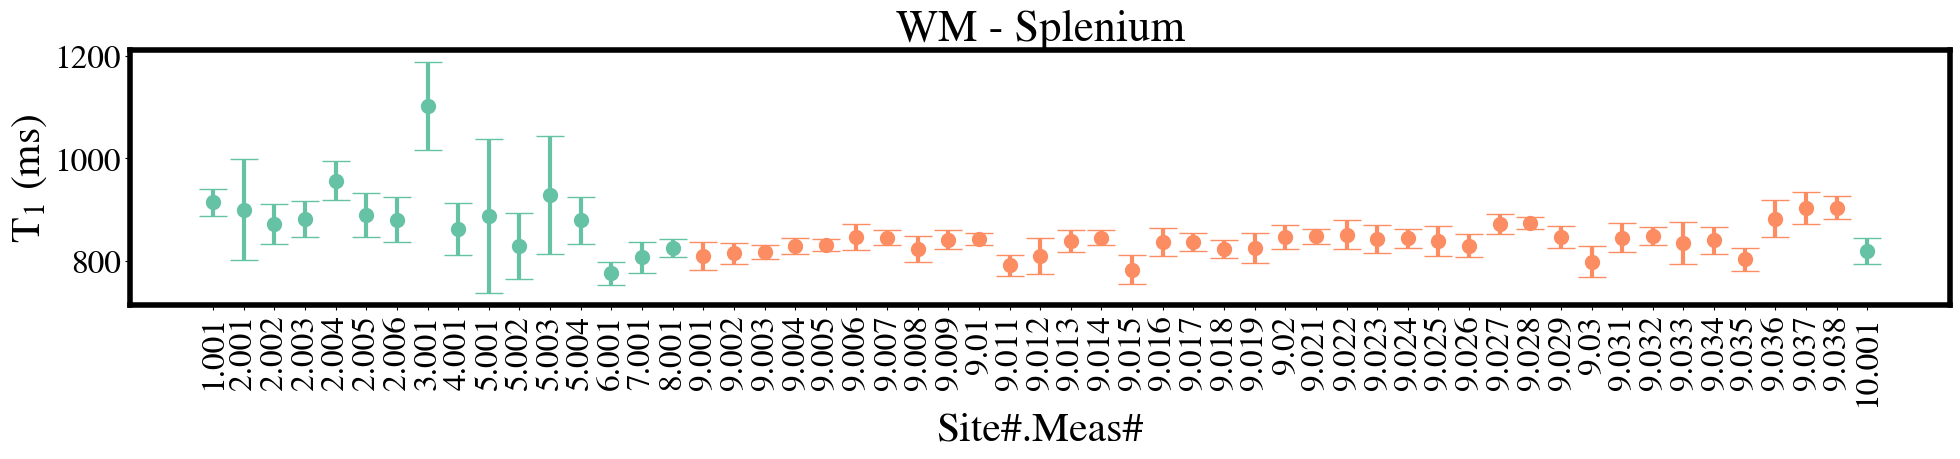

In [11]:
fig_id = plot_single_scatter(x=indexes_strings,
                             y=splenium_estimate,
                             y_std=splenium_std,
                             title='WM - Splenium',
                             x_label='Site#.Meas#',
                             y_label="T$_1$ (ms)",
                             file_prefix="WM_splenium",
                             folder_path=output_folder,
                             fig_id=fig_id,
                             y_type='meas')

/Users/mathieuboudreau/opt/anaconda3/envs/analysis_arm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/mathieuboudreau/opt/anaconda3/envs/analysis_arm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


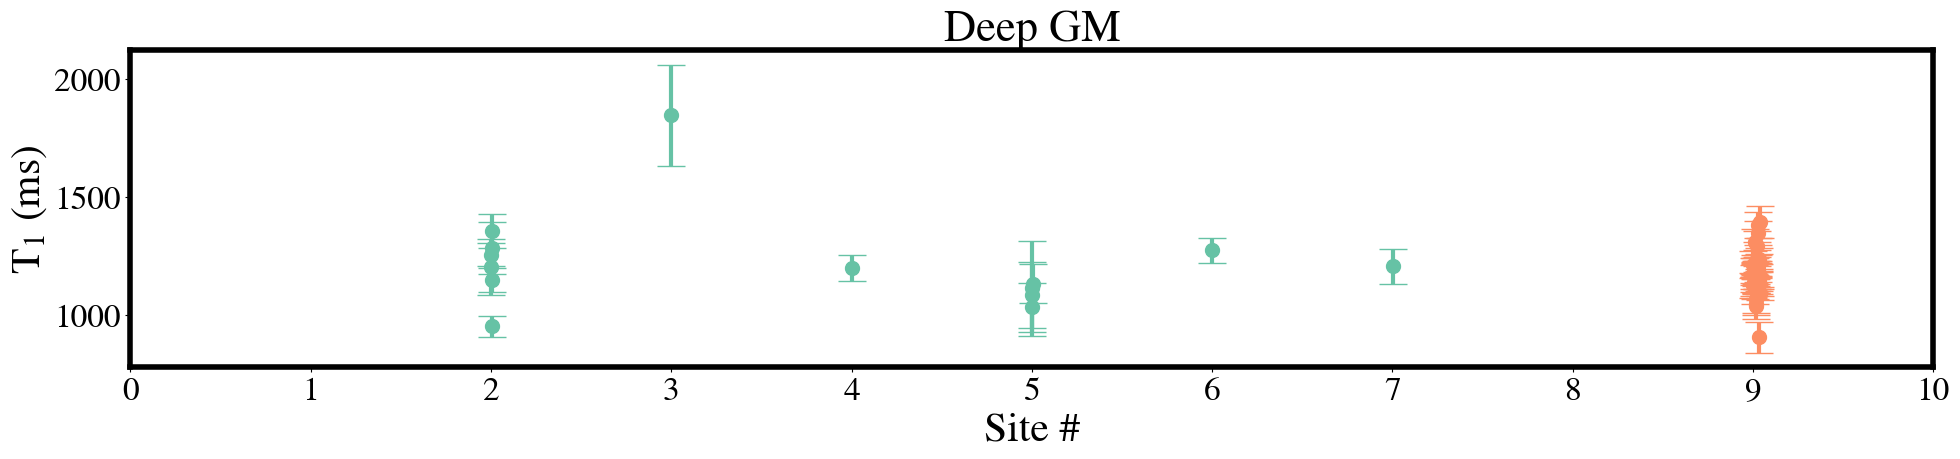

In [12]:
fig_id = plot_single_scatter(x=indexes_numbers,
                             y=deepgm_estimate,
                             y_std=deepgm_std,
                             title='Deep GM',
                             x_label='Site #',
                             y_label="T$_1$ (ms)",
                             file_prefix="GM_deep",
                             folder_path=output_folder,
                             fig_id=fig_id,
                             y_type='site')

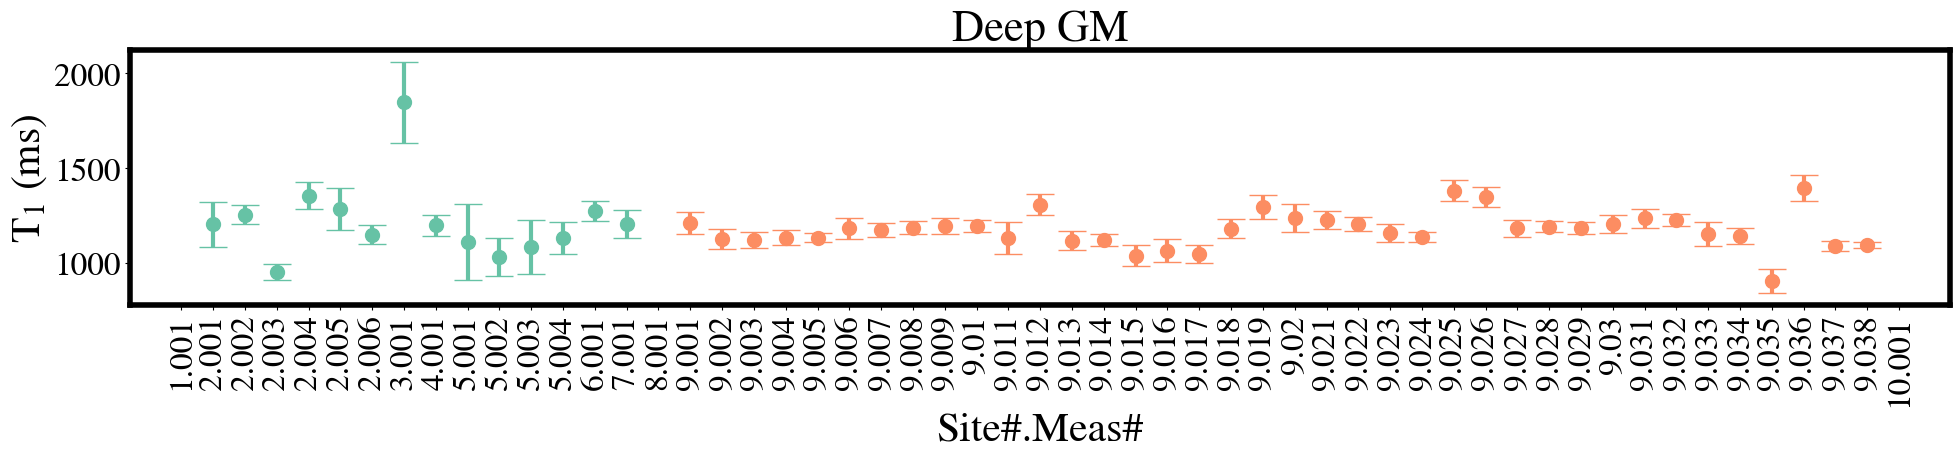

In [13]:
fig_id = plot_single_scatter(x=indexes_strings,
                            y=deepgm_estimate,
                            y_std=deepgm_std,
                            title='Deep GM',
                            x_label='Site#.Meas#',
                            y_label="T$_1$ (ms)",
                            file_prefix="GM_deep",
                            folder_path=output_folder,
                            fig_id=fig_id,
                            y_type='meas')

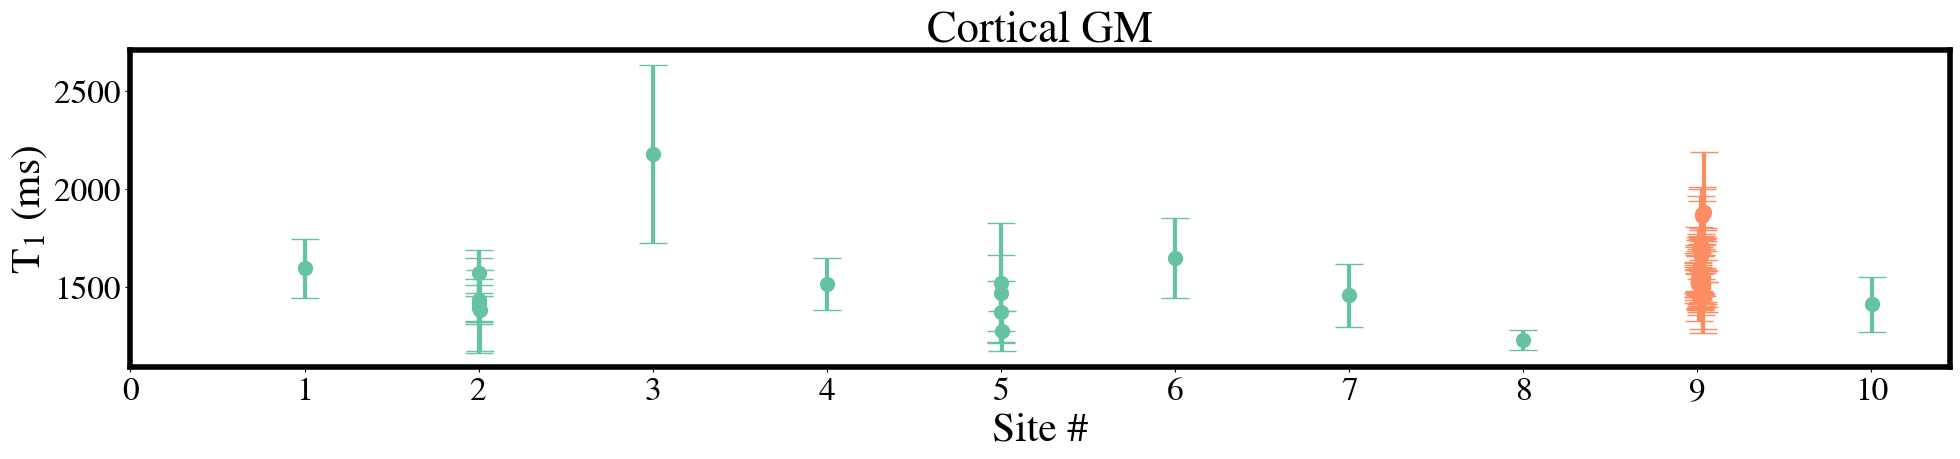

In [14]:
fig_id = plot_single_scatter(x=indexes_numbers,
                             y=cgm_estimate,
                             y_std=cgm_std,
                             title='Cortical GM',
                             x_label='Site #',
                             y_label="T$_1$ (ms)",
                             file_prefix="GM_cortical",
                             folder_path=output_folder,
                             fig_id=fig_id,
                             y_type='site')

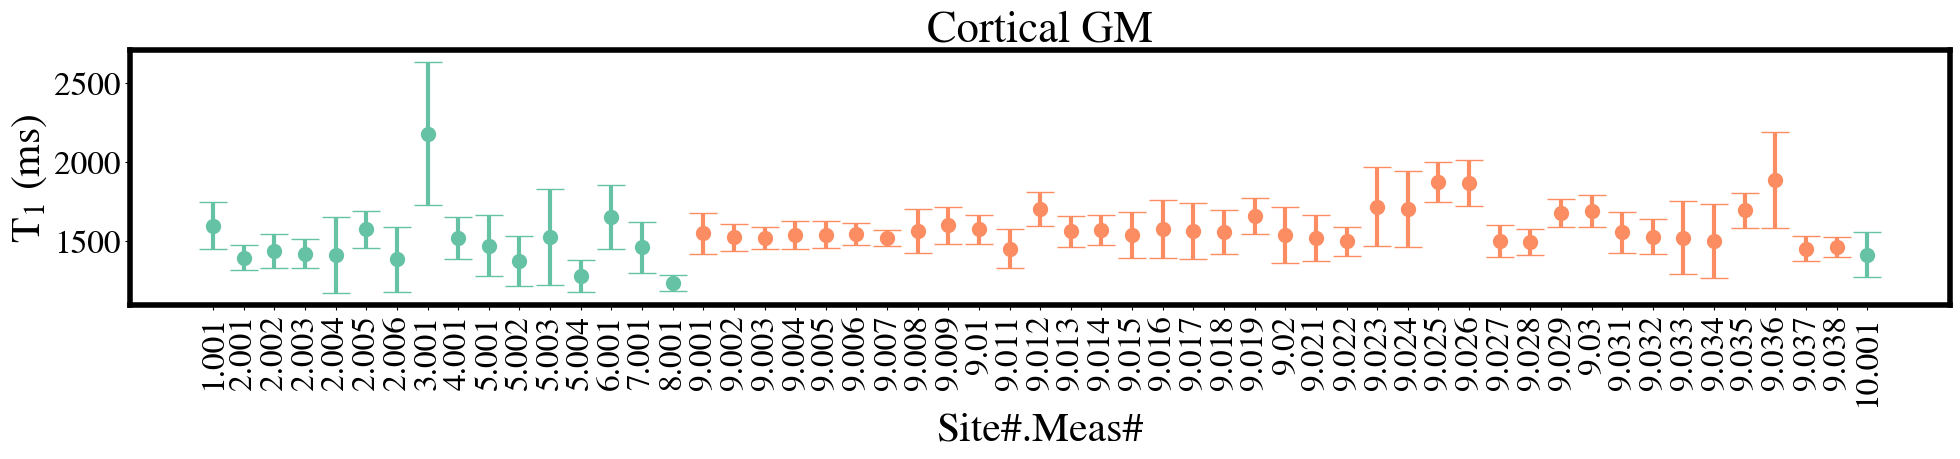

In [15]:
fig_id = plot_single_scatter(x=indexes_strings,
                             y=cgm_estimate,
                             y_std=cgm_std,
                             title='Cortical GM',
                             x_label='Site#.Meas#',
                             y_label="T$_1$ (ms)",
                             file_prefix="GM_cortical",
                             folder_path=output_folder,
                             fig_id=fig_id,
                             y_type='meas')

## Subplots

/var/folders/l1/1xswjffd73l8yp7dd7pq9lyw0000gn/T/ipykernel_36138/639034575.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(labels=x2, rotation=90)


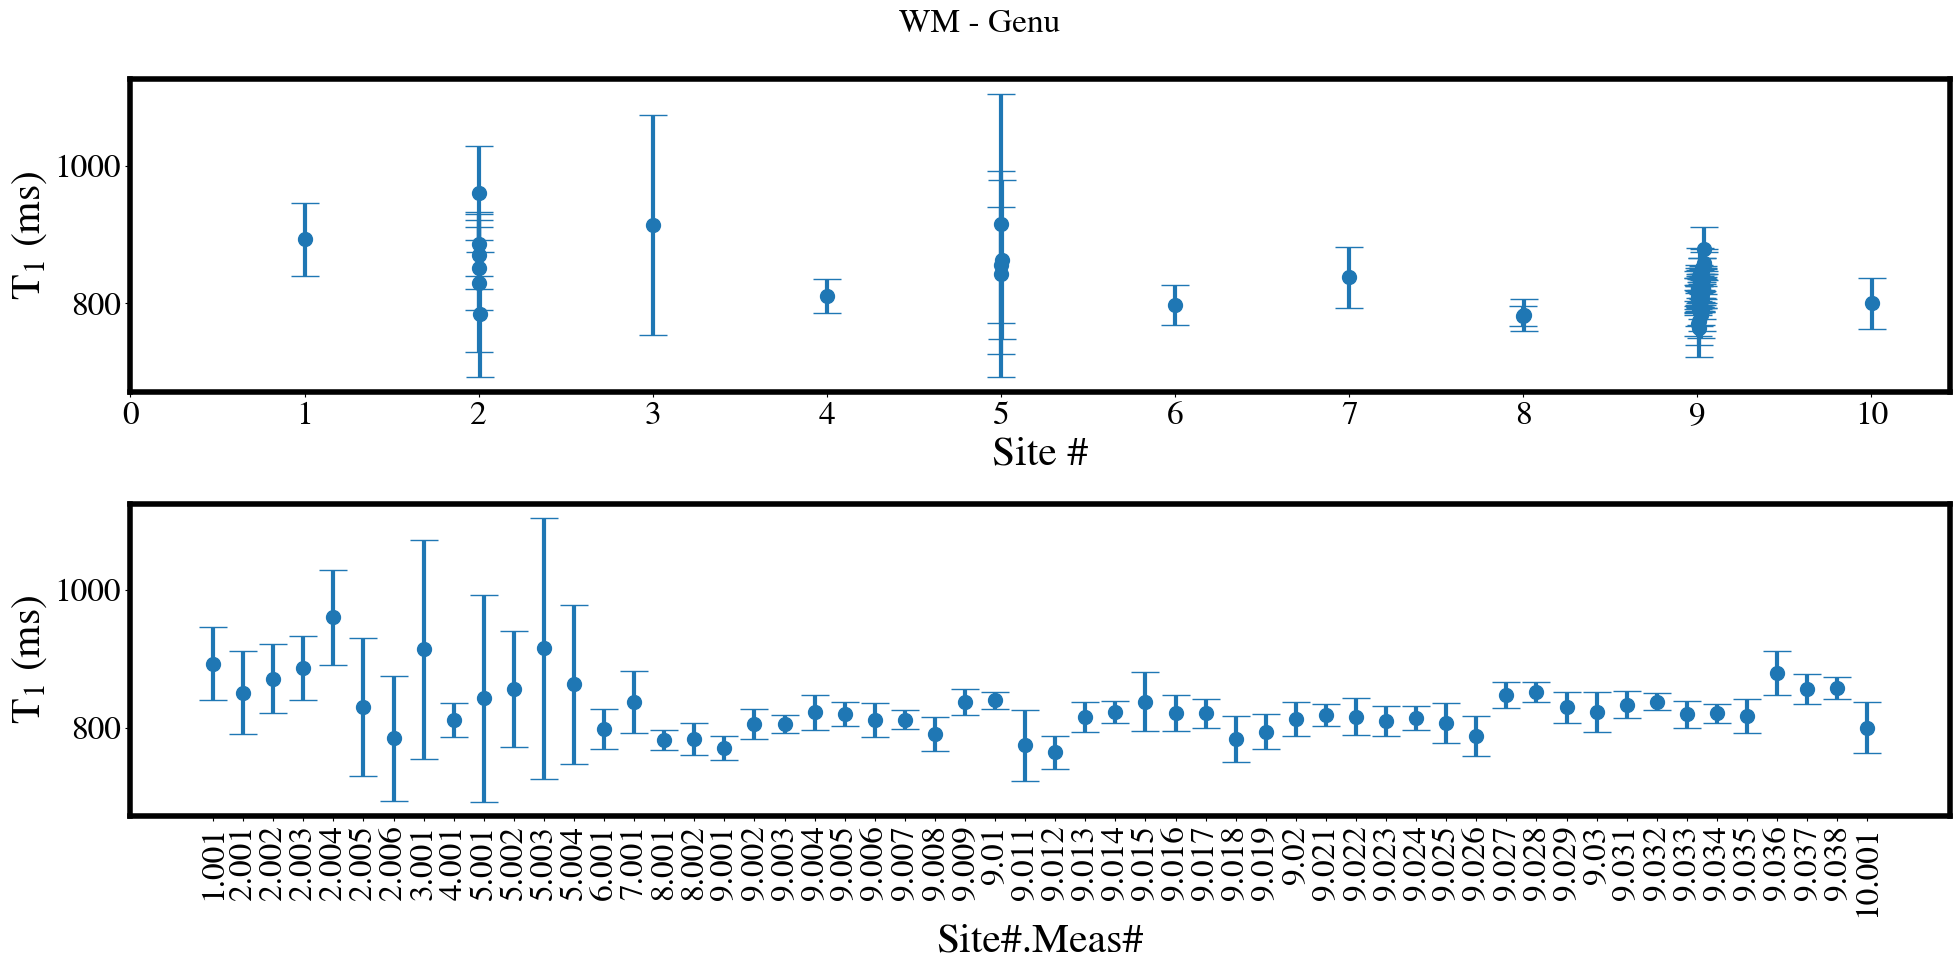

In [16]:
fig_id = plot_both_scatter(x1=indexes_numbers,
                           x2=indexes_strings,
                           y=genu_estimate,
                           y_std=genu_std,
                           title='WM - Genu',
                           x1_label='Site #',
                           x2_label='Site#.Meas#',
                           y_label="T$_1$ (ms)",
                           file_prefix="WM_genu",
                           folder_path=output_folder,
                           fig_id=fig_id)

/var/folders/l1/1xswjffd73l8yp7dd7pq9lyw0000gn/T/ipykernel_36138/639034575.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(labels=x2, rotation=90)


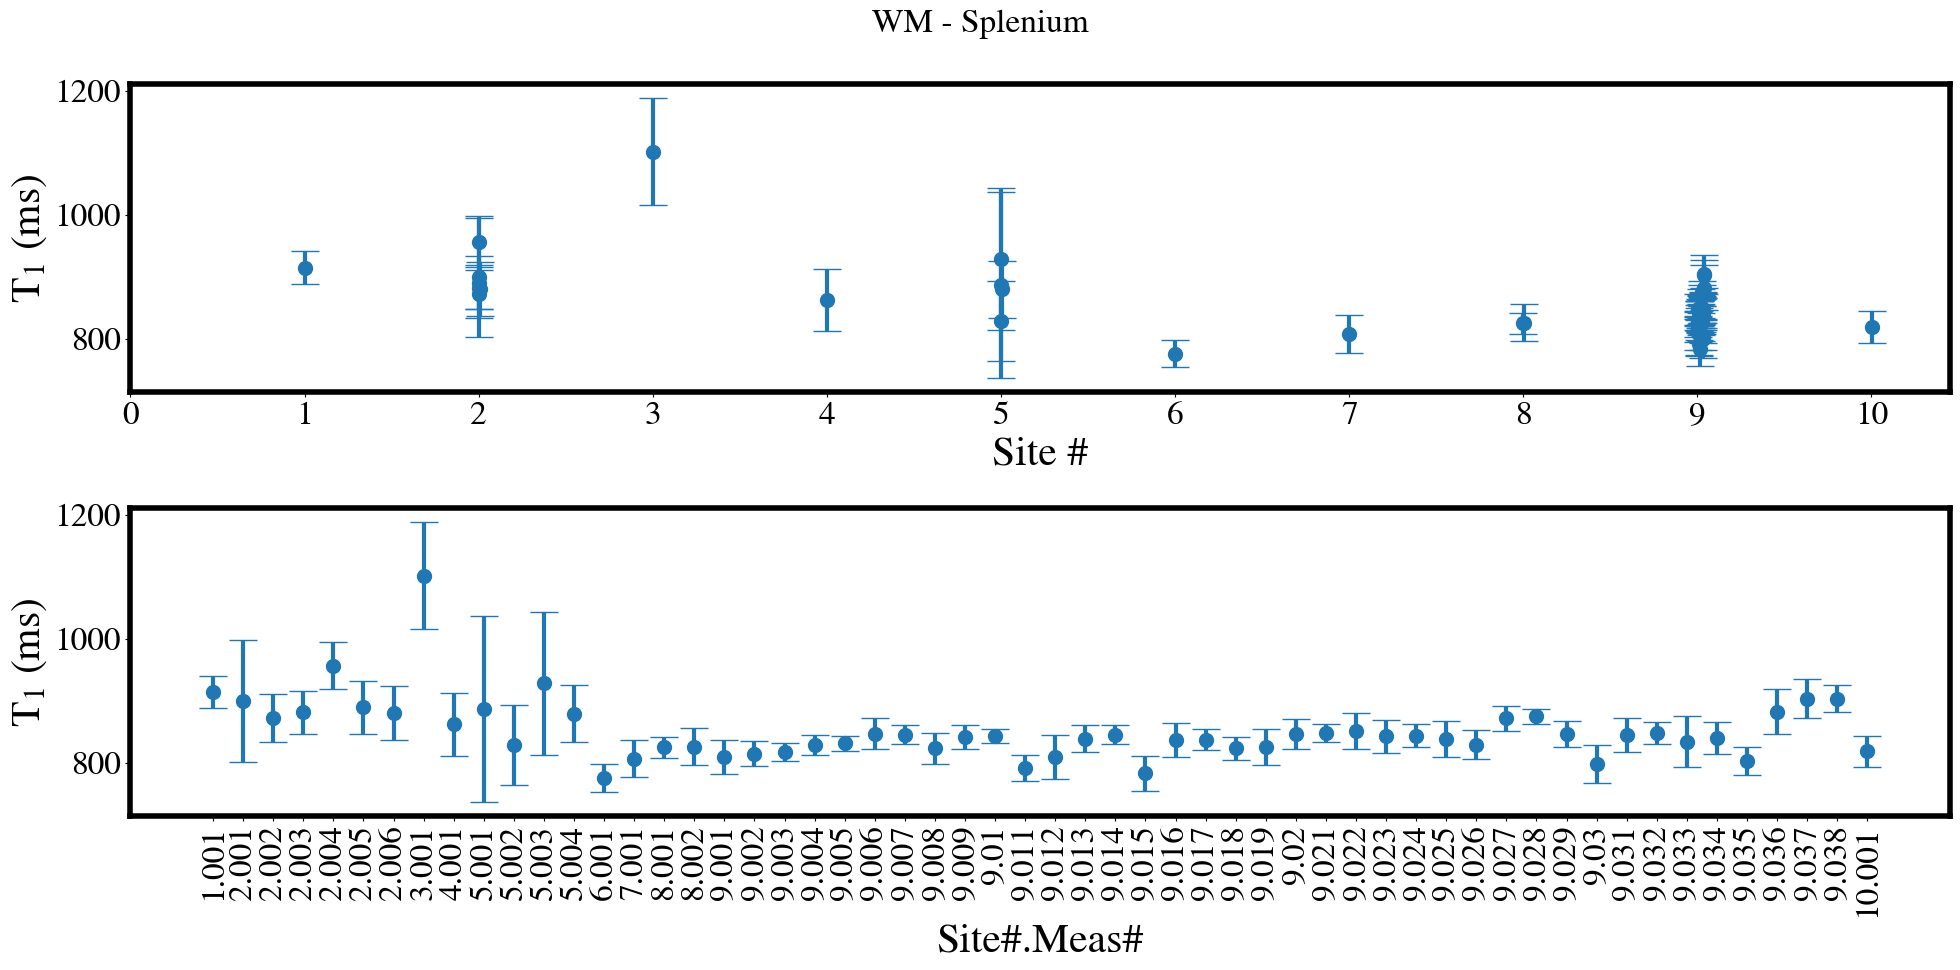

In [17]:
fig_id = plot_both_scatter(x1=indexes_numbers,
                           x2=indexes_strings,
                           y=splenium_estimate,
                           y_std=splenium_std,
                           title='WM - Splenium',
                           x1_label='Site #',
                           x2_label='Site#.Meas#',
                           y_label="T$_1$ (ms)",
                           file_prefix="WM_splenium",
                           folder_path=output_folder,
                           fig_id=fig_id)

/var/folders/l1/1xswjffd73l8yp7dd7pq9lyw0000gn/T/ipykernel_36138/639034575.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(labels=x2, rotation=90)


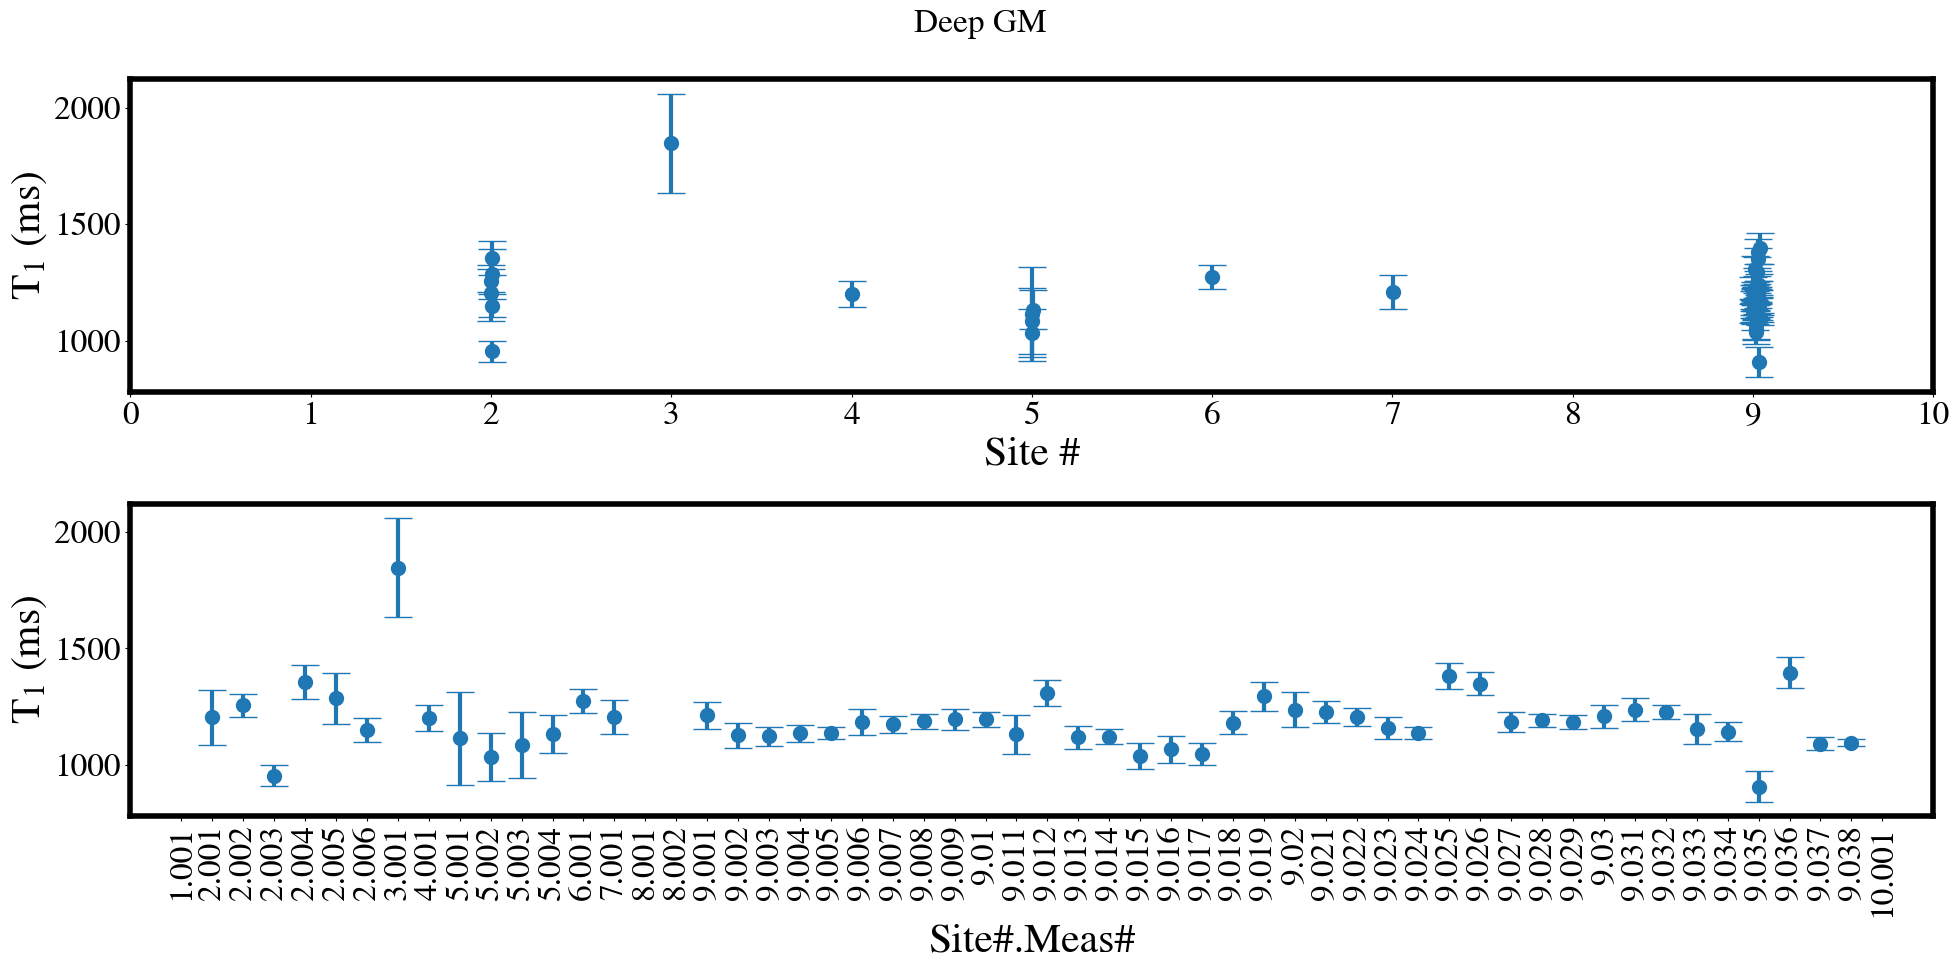

In [18]:
fig_id = plot_both_scatter(x1=indexes_numbers,
                           x2=indexes_strings,
                           y=deepgm_estimate,
                           y_std=deepgm_std,
                           title='Deep GM',
                           x1_label='Site #',
                           x2_label='Site#.Meas#',
                           y_label="T$_1$ (ms)",
                           file_prefix="GM_deep",
                           folder_path=output_folder,
                           fig_id=fig_id)

/var/folders/l1/1xswjffd73l8yp7dd7pq9lyw0000gn/T/ipykernel_36138/639034575.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(labels=x2, rotation=90)


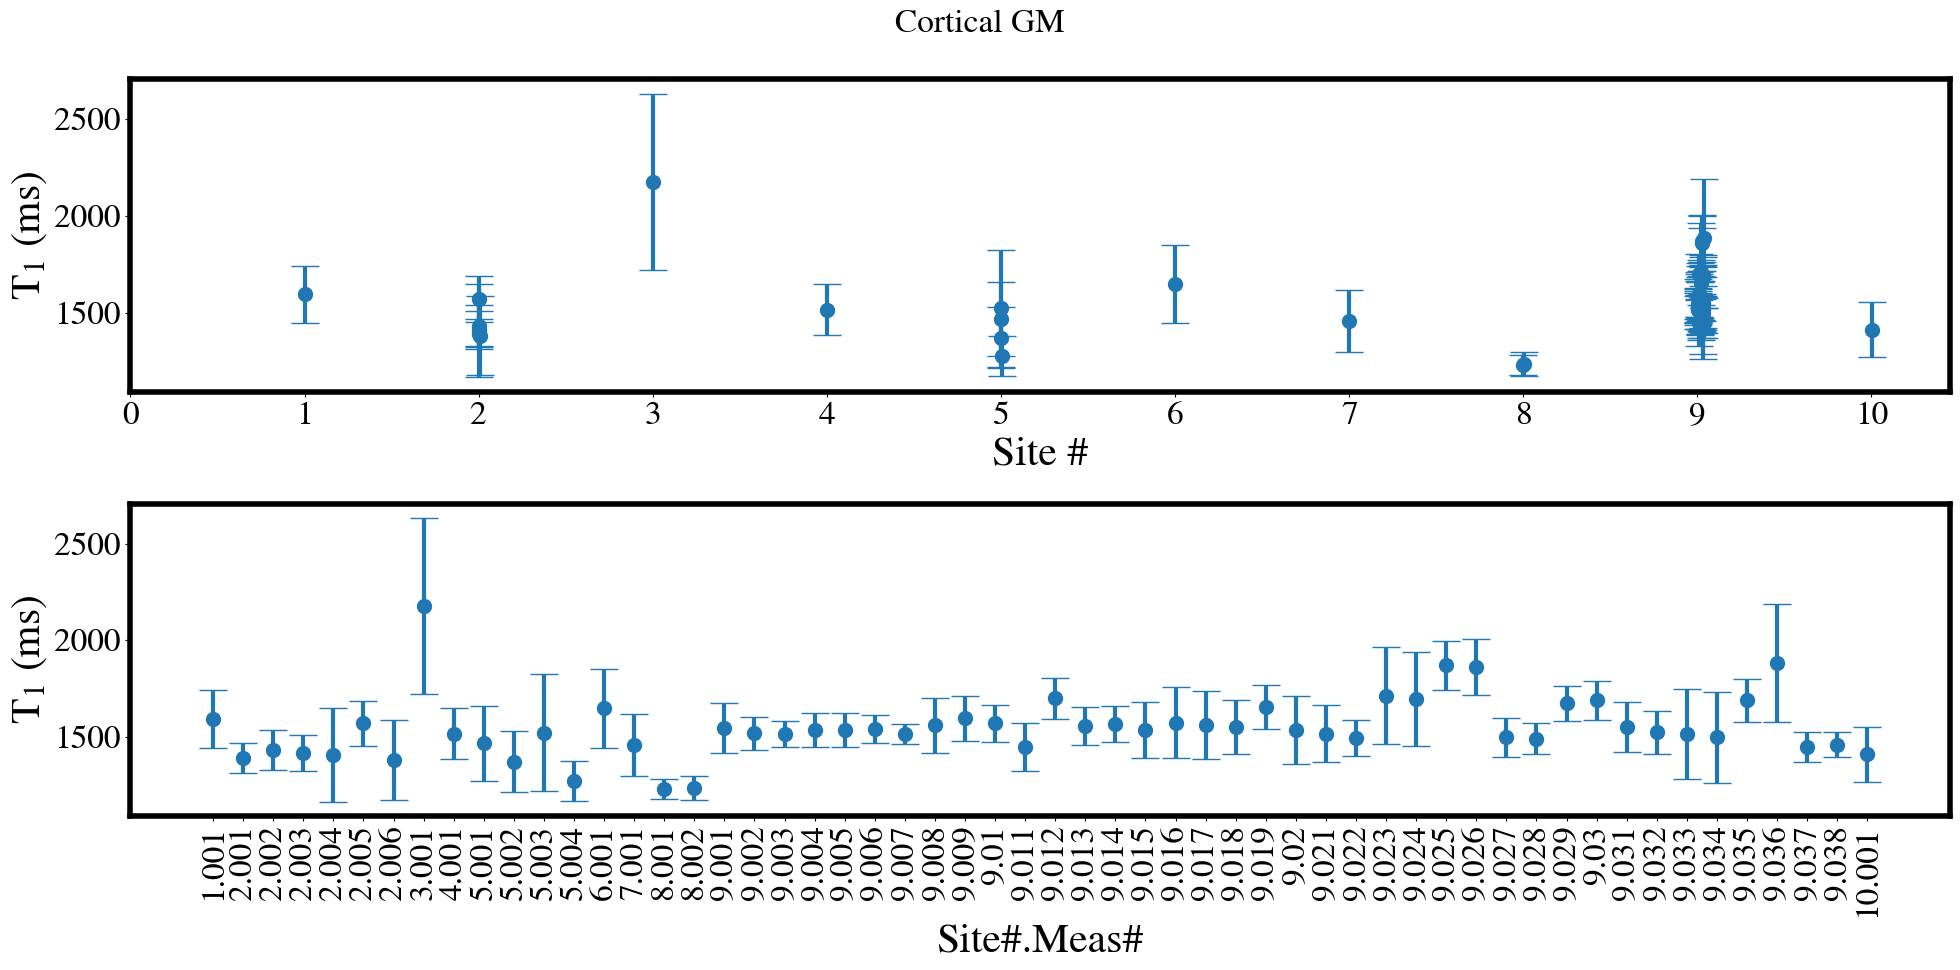

In [19]:
fig_id = plot_both_scatter(x1=indexes_numbers,
                           x2=indexes_strings,
                           y=cgm_estimate,
                           y_std=cgm_std,
                           title='Cortical GM',
                           x1_label='Site #',
                           x2_label='Site#.Meas#',
                           y_label="T$_1$ (ms)",
                           file_prefix="GM_cortical",
                           folder_path=output_folder,
                           fig_id=fig_id)

/var/folders/l1/1xswjffd73l8yp7dd7pq9lyw0000gn/T/ipykernel_36138/630522227.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(labels=x2, rotation=90)
/var/folders/l1/1xswjffd73l8yp7dd7pq9lyw0000gn/T/ipykernel_36138/630522227.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(labels=x2, rotation=90)


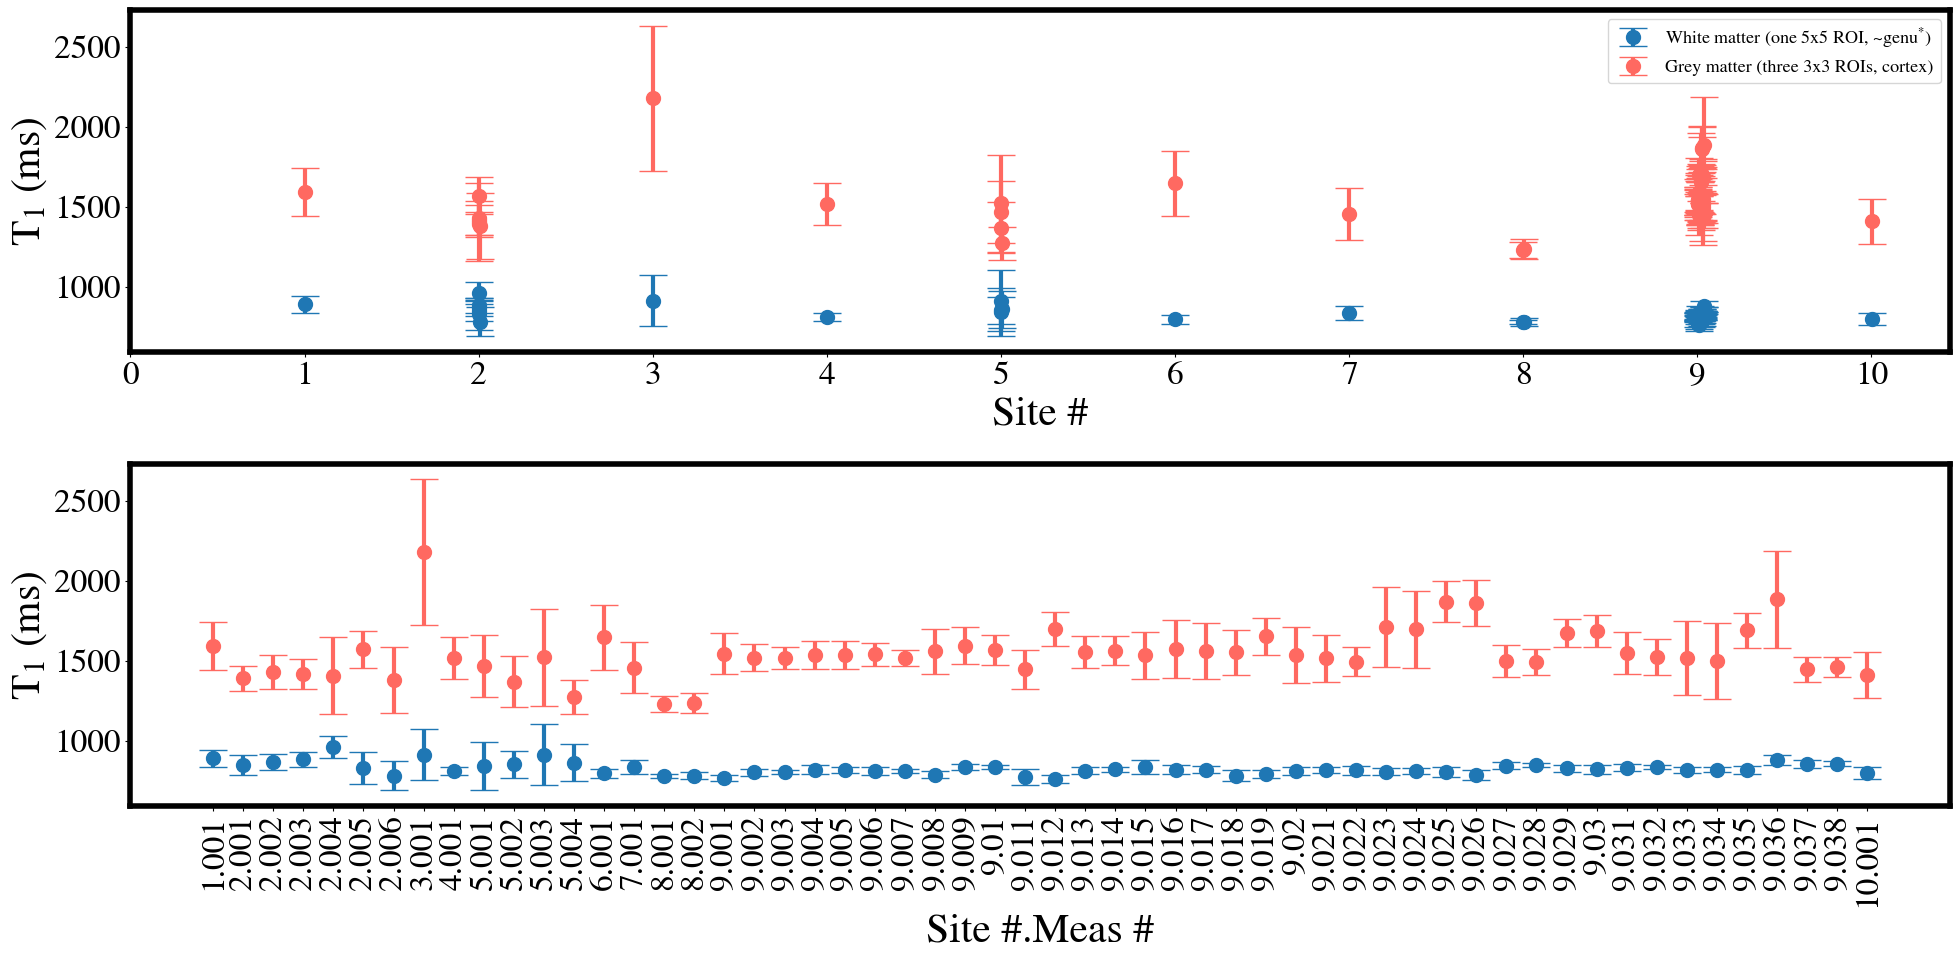

In [20]:
x1_label='Site #'
x2_label='Site #.Meas #'
y_label="T$_1$ (ms)"
file_prefix = 'WM_and_GM'
folder_path=output_folder

x1=indexes_numbers
x2=indexes_strings
y=genu_estimate
y_std=genu_std


plt.rcParams["figure.figsize"] = (20,10)

fig, axs = plt.subplots(2)
axs[0].errorbar(x1, y, y_std, fmt='o', solid_capstyle='projecting')
axs[0].set_xlabel(x1_label)
axs[0].set_ylabel(y_label)
axs[0].set_xticks(np.arange(0, np.max(x1), step=1))


axs[1].errorbar(x2, y, y_std, fmt='o', solid_capstyle='projecting')
axs[1].set_xlabel(x2_label)
axs[1].set_ylabel(y_label)
axs[1].set_xticklabels(labels=x2, rotation=90)

x1=indexes_numbers
x2=indexes_strings
y=cgm_estimate
y_std=cgm_std

axs[0].errorbar(x1, y, y_std, color='#FF6961', fmt='o', solid_capstyle='projecting')
axs[0].set_xlabel(x1_label)
axs[0].set_ylabel(y_label)
axs[0].set_xticks(np.arange(0, np.max(x1), step=1))


axs[1].errorbar(x2, y, y_std, color='#FF6961', fmt='o', solid_capstyle='projecting')
axs[1].set_xlabel(x2_label)
axs[1].set_ylabel(y_label)
axs[1].set_xticklabels(labels=x2, rotation=90)

axs[0].legend((r'White matter (one 5x5 ROI, ~genu$\mathregular{^{*}}$)', 'Grey matter (three 3x3 ROIs, cortex)'))

if fig_id<10:
    filename = "0" + str(fig_id) + "_" + file_prefix
else:
    filename = str(fig_id) + "_" + file_prefix

fig.savefig(folder_path / (str(filename) + '.svg'), facecolor='white')
fig.savefig(folder_path / (str(filename) + '.png'), facecolor='white')
fig_id = fig_id + 1
plt.show()


/var/folders/l1/1xswjffd73l8yp7dd7pq9lyw0000gn/T/ipykernel_36138/3877408191.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=x2, rotation=90)
/var/folders/l1/1xswjffd73l8yp7dd7pq9lyw0000gn/T/ipykernel_36138/3877408191.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=x2, rotation=90)


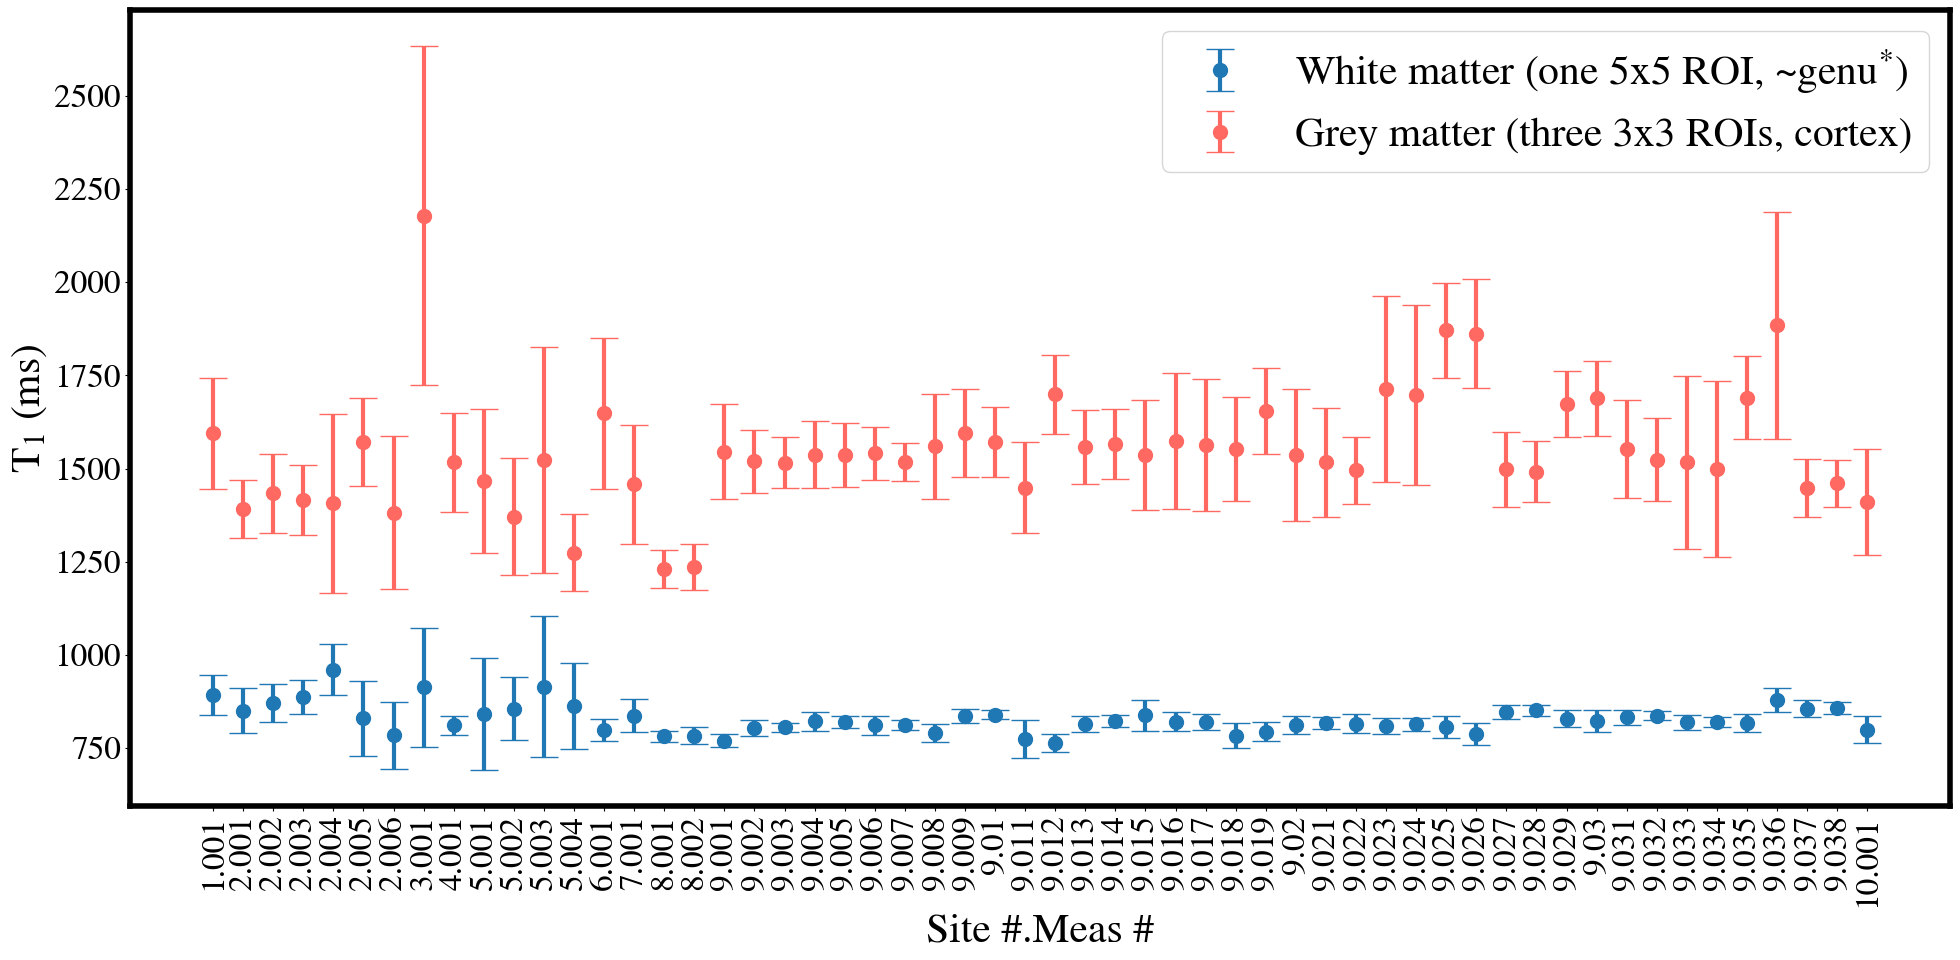

In [21]:
x2_label='Site #.Meas #'
y_label="T$_1$ (ms)"
file_prefix = 'WM_and_GM'
folder_path=output_folder

x2=indexes_strings
y=genu_estimate
y_std=genu_std


plt.rcParams["figure.figsize"] = (20,10)
fig, ax = plt.subplots(1)

ax.errorbar(x2, y, y_std, fmt='o', solid_capstyle='projecting')
ax.set_xlabel(x2_label)
ax.set_ylabel(y_label)
ax.set_xticklabels(labels=x2, rotation=90)

x2=indexes_strings
y=cgm_estimate
y_std=cgm_std

ax.errorbar(x2, y, y_std, color='#FF6961', fmt='o', solid_capstyle='projecting')
ax.set_xlabel(x2_label)
ax.set_ylabel(y_label)
ax.set_xticklabels(labels=x2, rotation=90)

ax.legend((r'White matter (one 5x5 ROI, ~genu$\mathregular{^{*}}$)', 'Grey matter (three 3x3 ROIs, cortex)'), prop={'size': 30})


plt.show()
